In [1]:
import torch

c:\Users\huiyi\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
samples = torch.rand(1, 1, 1, 8, 8)

In [3]:
mask = torch.BoolTensor(8, 8)
mask[1,1] = True



In [4]:
mask2 = torch.ones(8,8, dtype=torch.bool)

mask2[1,1] = False

mask2

tensor([[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True, False,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]])

In [5]:
samples[:,:,:, mask] = 100000
samples

tensor([[[[[1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05,
            1.0000e+05, 1.0000e+05, 1.0000e+05],
           [1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05,
            1.0000e+05, 1.0000e+05, 1.0000e+05],
           [1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05,
            1.0000e+05, 1.0000e+05, 1.0000e+05],
           [1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05,
            1.0000e+05, 1.0000e+05, 1.0000e+05],
           [1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05,
            1.0000e+05, 9.5512e-01, 5.7511e-02],
           [1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05,
            1.0000e+05, 7.0986e-01, 3.9303e-02],
           [1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05,
            1.0000e+05, 9.9758e-01, 5.3504e-01],
           [1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05, 1.0000e+05,
            1.0000e+05, 2.2661e-01, 1.7957e-01]]]]])

In [6]:
x_mod = samples

In [7]:
x_mod2 = x_mod.view(-1, 1, 8 ,8)

In [8]:
x_mod2.shape

torch.Size([1, 1, 8, 8])

In [9]:
x_mod2[..., mask]

tensor([[[100000., 100000., 100000., 100000., 100000., 100000., 100000.,
          100000., 100000., 100000., 100000., 100000., 100000., 100000.,
          100000., 100000., 100000., 100000., 100000., 100000., 100000.,
          100000., 100000., 100000., 100000., 100000., 100000., 100000.,
          100000., 100000., 100000., 100000., 100000., 100000., 100000.,
          100000., 100000., 100000., 100000., 100000., 100000., 100000.,
          100000., 100000., 100000., 100000., 100000., 100000., 100000.,
          100000., 100000., 100000., 100000., 100000., 100000., 100000.]]])

# picture generating

In [10]:
import numpy as np
import csv
import scipy
from sklearn.model_selection import train_test_split



tlist = scipy.io.loadmat('Heston' + '_tlist.mat')
tlist = tlist['tlist'] # note that they are 2D array 
tlist = tlist.reshape((-1))
# Klist = scipy.io.loadmat('msft_Klist.mat')
Klist = scipy.io.loadmat('Heston' + '_Klist.mat')
Klist = Klist['Klist'] # note that they are 2D array
Klist = Klist.reshape((-1))
totalvarsurface = scipy.io.loadmat('HestonIVSgrid_NI.mat')
# totalvarsurface = totalvarsurface['totalvarsurface']
totalvarsurface = totalvarsurface['HestonIVS2D']
IVStrain, IVStest = train_test_split(totalvarsurface, test_size = 0.2, random_state = 42)

In [11]:
len(tlist)

8

In [12]:
surfivs = IVStrain[0:6]
print(surfivs.shape)
surfivspred = surfivs.copy() * 1.2
surfivspred[1,1] = surfivs[1,1] * 1.56
surfivspred.shape

(6, 8, 8)


(6, 8, 8)

In [13]:
def inpainting_error(surfivs, surfivspred, Klist, tlist,  plotname='HestoninpaintingErrors'):
    """surfivs shape (batch_size, image_size_y, image_size_x)"""
    from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mtick

    plt.figure(1,figsize=(14,4))
    ax=plt.subplot(1,3,1)
    err = np.mean(100 * np.abs((surfivspred - surfivs)/ surfivs), axis =0) 
    plt.title("Average relative error",fontsize=15,y=1.04)
    plt.imshow(err.reshape(len(tlist),len(Klist)))
    plt.colorbar(format=mtick.PercentFormatter())

    ax.set_xticks(np.linspace(0,len(Klist)-1,len(Klist)))
    ax.set_xticklabels(Klist.astype('int'))

    # ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticklabels([str(round(t,2)) for t in tlist])
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # ax.yaxis.set_major_formatter('{x:9<5.1f}')
    # plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.xlabel("Strike",fontsize=15,labelpad=5)
    plt.ylabel("Maturity",fontsize=15,labelpad=5)

    ax=plt.subplot(1,3,2)
    err = 100*np.std(np.abs((surfivspred-surfivs)/surfivs),axis = 0)
    plt.title("Std relative error",fontsize=15,y=1.04)
    plt.imshow(err.reshape(len(tlist),len(Klist)))
    plt.colorbar(format=mtick.PercentFormatter())
    ax.set_xticks(np.linspace(0,len(Klist)-1,len(Klist)))
    ax.set_xticklabels(Klist.astype('int'))
    ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticklabels([str(round(t,2)) for t in tlist])
    plt.xlabel("Strike",fontsize=15,labelpad=5)
    plt.ylabel("Maturity",fontsize=15,labelpad=5)

    ax=plt.subplot(1,3,3)
    err = 100*np.max(np.abs((surfivspred-surfivs)/surfivs),axis = 0)
    plt.title("Maximum relative error",fontsize=15,y=1.04)
    plt.imshow(err.reshape(len(tlist),len(Klist)))
    plt.colorbar(format=mtick.PercentFormatter())
    ax.set_xticks(np.linspace(0,len(Klist)-1,len(Klist)))
    ax.set_xticklabels(Klist.astype('int'))
    ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticklabels([str(round(t,2)) for t in tlist])
    plt.xlabel("Strike",fontsize=15,labelpad=5)
    plt.ylabel("Maturity",fontsize=15,labelpad=5)
    plt.tight_layout()
    plt.savefig(plotname+ '.png', dpi=300)
    plt.show()



ValueError: cannot reshape array of size 1 into shape (6,6)

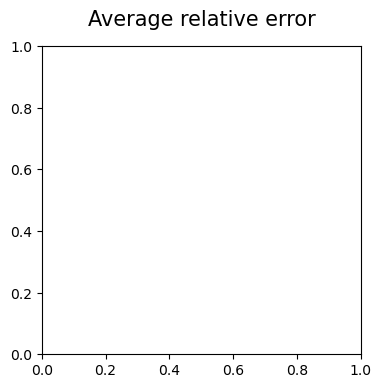

In [14]:
inpainting_error(tlist, Klist, surfivs, surfivspred, plotname='HestoninpaintingErrors')

In [15]:
Klist

array([ 60.65306597,  69.96725374,  80.7117747 ,  93.10627797,
       107.40414307, 123.89765975, 142.92400324, 164.87212707])

In [ ]:
# strikes_dim=len(Klist)
# maturities_dim=len(tlist)
# strikeslabel=np.round(np.linspace(strikes[0],strikes[-1],8),1)
# maturitieslabel=np.array([0.1,0.2, 0.6, 1.5,1.8])
# ##### AVERAGE VALUES #######
# X_sample = xinversetransform(x_test_transform)
# y_sample = y_test_transform

# prediction=[xinversetransform(modelGEN.predict(y_sample[i].reshape(1,5))[0]) for i in range(len(y_sample))]
# plt.figure(1,figsize=(14,4))
# ax=plt.subplot(1,3,1)
# err = np.mean(100*np.abs((X_sample-prediction)/X_sample),axis = 0)
# plt.title("Average relative error",fontsize=15,y=1.04)
# plt.imshow(err.reshape(maturities_dim,strikes_dim))
# plt.colorbar(format=mtick.PercentFormatter())

# ax.set_xticks(np.linspace(0,len(strikes)-1,len(strikes)))
# ax.set_xticklabels(strikes)
# ax.set_yticks(np.linspace(0,len(maturities)-1,len(maturities)))
# ax.set_yticklabels(maturities)
# plt.xlabel("Strike",fontsize=15,labelpad=5)
# plt.ylabel("Maturity",fontsize=15,labelpad=5)

NameError: name 'strikes' is not defined

# Testing out Dataloader and Dset

In [16]:
IVStrain, IVStest = train_test_split(totalvarsurface, test_size = 0.2, random_state = 42)

In [17]:
from datasets.Dset import *
from torch.utils.data import DataLoader, Subset

dataset = Dset(IVStest)
dataset = Dset(IVStest)
batch_size = 10
dataloader = DataLoader(dataset, batch_size=batch_size,shuffle=True, drop_last=True)
refer_image = next(iter(dataloader))

In [18]:
dataset.x.

SyntaxError: invalid syntax (2235702112.py, line 1)

In [19]:
refer_image.shape

torch.Size([10, 8, 8])

In [20]:
pred_test = refer_image * 1.2
type(pred_test)

torch.Tensor

In [21]:
def inpainting_error_torch(surfivs, surfivspred, Klist, tlist, savepath, ):
    """surfivs shape (batch_size, image_size_y, image_size_x)"""
    from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mtick
    import torch
    plt.figure(1,figsize=(14,4))
    ax=plt.subplot(1,3,1)
    # err = np.mean(100 * np.abs((surfivspred - surfivs)/ surfivs), axis =0) 
    err = torch.mean(100 * torch.abs((surfivspred - surfivs)/ surfivs), dim =0) 
    plt.title("Average relative error",fontsize=15,y=1.04)
    plt.imshow(err.reshape(len(tlist),len(Klist)))
    plt.colorbar(format=mtick.PercentFormatter())

    ax.set_xticks(np.linspace(0,len(Klist)-1,len(Klist)))
    ax.set_xticklabels(Klist.astype('int'))

    # ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticklabels([str(round(t,2)) for t in tlist])
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # ax.yaxis.set_major_formatter('{x:9<5.1f}')
    # plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.xlabel("Strike",fontsize=15,labelpad=5)
    plt.ylabel("Maturity",fontsize=15,labelpad=5)

    ax=plt.subplot(1,3,2)
    # err = 100*np.std(np.abs((surfivspred-surfivs)/surfivs),axis = 0)
    err = 100*torch.std(torch.abs((surfivspred-surfivs)/surfivs),dim = 0)
    plt.title("Std relative error",fontsize=15,y=1.04)
    plt.imshow(err.reshape(len(tlist),len(Klist)))
    plt.colorbar(format=mtick.PercentFormatter())
    ax.set_xticks(np.linspace(0,len(Klist)-1,len(Klist)))
    ax.set_xticklabels(Klist.astype('int'))
    ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticklabels([str(round(t,2)) for t in tlist])
    plt.xlabel("Strike",fontsize=15,labelpad=5)
    plt.ylabel("Maturity",fontsize=15,labelpad=5)

    ax=plt.subplot(1,3,3)
    # err = 100*np.max(np.abs((surfivspred-surfivs)/surfivs),axis = 0)
    err = 100*torch.max(torch.abs((surfivspred-surfivs)/surfivs),dim = 0)[0]
    plt.title("Maximum relative error",fontsize=15,y=1.04)
    plt.imshow(err.reshape(len(tlist),len(Klist)))
    plt.colorbar(format=mtick.PercentFormatter())
    ax.set_xticks(np.linspace(0,len(Klist)-1,len(Klist)))
    ax.set_xticklabels(Klist.astype('int'))
    ax.set_yticks(np.linspace(0,len(tlist)-1,len(tlist)))
    ax.set_yticklabels([str(round(t,2)) for t in tlist])
    plt.xlabel("Strike",fontsize=15,labelpad=5)
    plt.ylabel("Maturity",fontsize=15,labelpad=5)
    plt.tight_layout()
    plt.savefig(savepath, dpi=300)
    # plt.show()

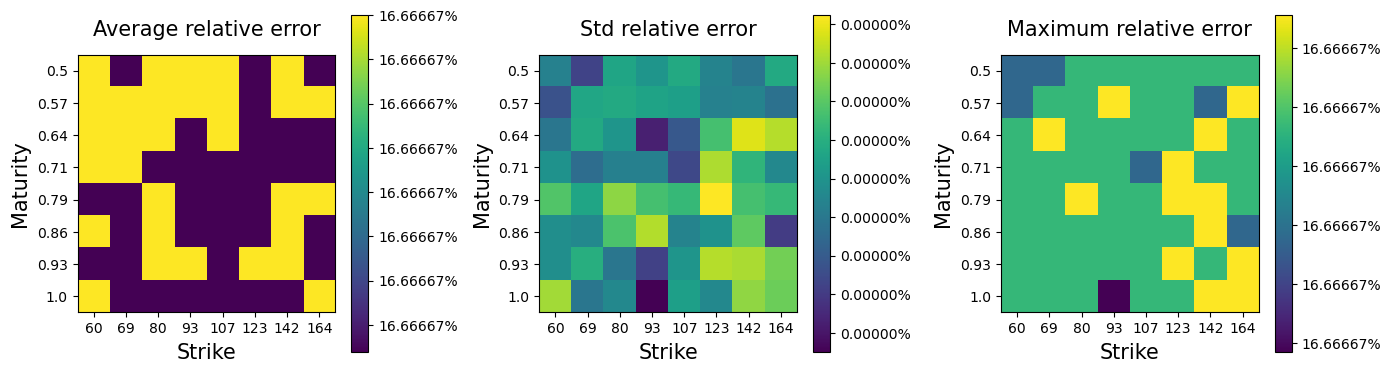

In [22]:
# savepath2 = os.path.join(self.args.image_folder, 'ivs_error_inpaintingtest.png')
inpainting_error_torch(pred_test, refer_image, Klist, tlist, 'ivs_error_inpaintingtest.png', )

In [23]:
pred_test.shape

torch.Size([10, 8, 8])

In [24]:
totalvarsurface
tlist

array([0.5       , 0.57142857, 0.64285714, 0.71428571, 0.78571429,
       0.85714286, 0.92857143, 1.        ])

In [25]:
tlist_broadcast = tlist.reshape((1, 8, 1))
totalvarsurface_scaled = totalvarsurface**2 * tlist_broadcast

In [26]:
totalvarsurface[0]

array([[0.65521685, 0.64610361, 0.63688751, 0.6275889 , 0.61823171,
        0.6088458 , 0.59946916, 0.59014974],
       [0.65032957, 0.64122107, 0.63201047, 0.62271694, 0.61336384,
        0.60398078, 0.5946057 , 0.5852867 ],
       [0.64553117, 0.63642963, 0.62722626, 0.61793945, 0.60859208,
        0.59921361, 0.58984192, 0.58052526],
       [0.64082037, 0.63172765, 0.62253314, 0.6132546 , 0.60391461,
        0.59454242, 0.58517595, 0.57586354],
       [0.63619576, 0.62711351, 0.61792938, 0.60866064, 0.5993296 ,
        0.58996541, 0.58060595, 0.5712997 ],
       [0.63165582, 0.62258557, 0.61341326, 0.60415581, 0.59483531,
        0.58548079, 0.57613014, 0.56683191],
       [0.62719904, 0.61814219, 0.60898311, 0.59973841, 0.59042998,
        0.58108679, 0.5717467 , 0.56245835],
       [0.62282389, 0.61378178, 0.60463727, 0.59540673, 0.58611191,
        0.57678167, 0.56745388, 0.55817724]])

In [27]:
totalvarsurface_scaled[0, :, 0]

array([0.21465456, 0.24167345, 0.26788531, 0.29332197, 0.31801396,
       0.34199064, 0.36528017, 0.3879096 ])

In [28]:
totalvarsurface_scaled[0, :, :]
# this good!

array([[0.21465456, 0.20872494, 0.20281285, 0.19693391, 0.19110522,
        0.18534661, 0.17968164, 0.17413836],
       [0.24167345, 0.23495112, 0.22824985, 0.22158651, 0.21498012,
        0.20845302, 0.20203197, 0.19574887],
       [0.26788531, 0.26038457, 0.25290822, 0.24547446, 0.23810421,
        0.23082232, 0.22365867, 0.21664901],
       [0.29332197, 0.28505702, 0.27681965, 0.26862944, 0.26050918,
        0.25248621, 0.24459349, 0.23687059],
       [0.31801396, 0.30899892, 0.30001456, 0.29108182, 0.28222541,
        0.27347508, 0.26486686, 0.25644406],
       [0.34199064, 0.33223953, 0.32252214, 0.31286078, 0.30328204,
        0.29381808, 0.28450794, 0.27539864],
       [0.36528017, 0.35480693, 0.3443704 , 0.33399429, 0.32370703,
        0.31354316, 0.3035447 , 0.2937623 ],
       [0.3879096 , 0.37672807, 0.36558623, 0.35450918, 0.34352717,
        0.33267709, 0.3220039 , 0.31156184]])

In [ ]:
reverse = np.sqrt(totalvarsurface_scaled / tlist_broadcast)
booltest= reverse == totalvarsurface
# booltest= booltest.astype('int')
# sum(booltest)
booltest.sum()

396618

In [ ]:
booltest.shape

(6407, 8, 8)

In [ ]:
6407 * 64
# anyway accept it is ok, I think False are just numerical errors 

410048

In [ ]:
np.unique(booltest[:,1,0])
np.sum(booltest[:,1,0])

6253

In [35]:
from datasets.Dset import * 

refer_image

loss = Dcondloss_torch(torch.squeeze(refer_image), torch.squeeze(refer_image), tlist)

idx = (loss < 3) 

In [42]:
refer_image

tensor([[[0.5826, 0.5721, 0.5613, 0.5501, 0.5387, 0.5268, 0.5146, 0.5020],
         [0.5803, 0.5699, 0.5591, 0.5480, 0.5366, 0.5249, 0.5127, 0.5002],
         [0.5780, 0.5676, 0.5570, 0.5460, 0.5347, 0.5230, 0.5109, 0.4985],
         [0.5758, 0.5655, 0.5549, 0.5440, 0.5327, 0.5211, 0.5092, 0.4969],
         [0.5736, 0.5634, 0.5528, 0.5420, 0.5308, 0.5193, 0.5075, 0.4953],
         [0.5715, 0.5613, 0.5508, 0.5401, 0.5290, 0.5176, 0.5058, 0.4937],
         [0.5694, 0.5593, 0.5489, 0.5382, 0.5272, 0.5159, 0.5042, 0.4922],
         [0.5673, 0.5573, 0.5470, 0.5364, 0.5254, 0.5142, 0.5027, 0.4908]],

        [[0.4571, 0.4380, 0.4182, 0.3977, 0.3770, 0.3570, 0.3392, 0.3254],
         [0.4631, 0.4448, 0.4259, 0.4065, 0.3869, 0.3680, 0.3507, 0.3366],
         [0.4686, 0.4511, 0.4331, 0.4146, 0.3961, 0.3781, 0.3613, 0.3471],
         [0.4738, 0.4570, 0.4398, 0.4222, 0.4046, 0.3873, 0.3712, 0.3570],
         [0.4787, 0.4626, 0.4460, 0.4292, 0.4124, 0.3959, 0.3803, 0.3663],
         [0.4833, 0.467

In [37]:
idx[1] = False

In [39]:
check = refer_image[idx]

In [44]:
refer_image[idx] = 0 
refer_image


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.4571, 0.4380, 0.4182, 0.3977, 0.3770, 0.3570, 0.3392, 0.3254],
         [0.4631, 0.4448, 0.4259, 0.4065, 0.3869, 0.3680, 0.3507, 0.3366],
         [0.4686, 0.4511, 0.4331, 0.4146, 0.3961, 0.3781, 0.3613, 0.3471],
         [0.4738, 0.4570, 0.4398, 0.4222, 0.4046, 0.3873, 0.3712, 0.3570],
         [0.4787, 0.4626, 0.4460, 0.4292, 0.4124, 0.3959, 0.3803, 0.3663],
         [0.4833, 0.467

array([0.5       , 0.57142857, 0.64285714, 0.71428571, 0.78571429,
       0.85714286, 0.92857143, 1.        ])